<a href="https://colab.research.google.com/github/IrinaS-D/Economic-data-analysis/blob/main/Numerical_Methods_Project2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numerical Methods Project

Prepared by Irina Roxana Sucoverschi - December 2023

#Challenge 1

#McCullough's Analysis of Fox's Review of the Klein-Goldberger Model

The paper written by B. D. McCullough, Charles G. Renfro and Houston H. Stokes, *Re-
examining 50-year-old OLS estimates of the Klein–Goldberger model*,  critically examines the ordinary least squares (OLS) estimates of the Klein–Goldberger model presented by Fox in 1956.

The Klein–Goldberger model, created in the 1950s, was originally estimated using electro-mechanical desk calculators.

The authors attempt to replicate Fox's OLS results using modern econometric software packages and find that while some estimates are replicable, others are not. The discrepancies are attributed to computational methods used by Fox and his assistants, which were found to be faulty by modern standards. The study emphasizes the importance of independent verification of applied results, highlighting that even with advances in computing over the past 50 years, problems of computational accuracy persist.

Furthermore, the authors suggest the need for continued testing and improvement of econometric software and advocate for more opportunities for replication and verification in published research.

Our goal is to use the Ordinary Least
Squares and other methods to verify some of the allegations from the review paper [McCullough-2006].

References:

[Wikipedia] https://en.wikipedia.org/wiki/Klein%E2%80%93Goldberger_model

[Data] https://pages.stern.nyu.edu/~wgreene/Text/tables/tablelist5.htm

[ChatGPT 3.5], OpenAI, chat.openai.com. “Summarize McCullough's text” prompt. Version release date: 30 Nov-OpenAI, Used: 18 Dec.

[Klein-1950] Klein, L., Economic fluctuations in the United States, 1921-1941, New
York, John Wiley and Sons (1950).

[McCullough-2006] McCullough, B. D., Renfro, Charles G., Stokes, Houston H., Re-
examining 50-year-old OLS estimates of the Klein–Goldberger model. Statistica
Neerlandica (2006) Vol. 60, nr. 2, pp. 181–193.



In [1]:
import io
import pandas as pd

import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

Copy csv information extracted from the table provided directly into python and create two additional columns for K1 (previous year's capital stock) to show BoYear - beginning of year values, and EoYear - end of year values.

In [2]:
Klein_annual_data='''
Year,C,P,Wp,I,K1-BoYear,K-EoYear,X,Wg,G,T
1920,39.8,12.7,28.8,2.7,180.1,182.8,44.9,2.2,2.4,3.4
1921,41.9,12.4,25.5,-0.2,182.8,182.6,45.6,2.7,3.9,7.7
1922,45.0,16.9,29.3,1.9,182.6,184.5,50.1,2.9,3.2,3.9
1923,49.2,18.4,34.1,5.2,184.5,189.7,57.2,2.9,2.8,4.7
1924,50.6,19.4,33.9,3.0,189.7,192.7,57.1,3.1,3.5,3.8
1925,52.6,20.1,35.4,5.1,192.7,197.8,61.0,3.2,3.3,5.5
1926,55.1,19.6,37.4,5.6,197.8,203.4,64.0,3.3,3.3,7.0
1927,56.2,19.8,37.9,4.2,203.4,207.6,64.4,3.6,4.0,6.7
1928,57.3,21.1,39.2,3.0,207.6,210.6,64.5,3.7,4.2,4.2
1929,57.8,21.7,41.3,5.1,210.6,215.7,67.0,4.0,4.1,4.0
1930,55.0,15.6,37.9,1.0,215.7,216.7,61.2,4.2,5.2,7.7
1931,50.9,11.4,34.5,-3.4,216.7,213.3,53.4,4.8,5.9,7.5
1932,45.6,7.0,29.0,-6.2,213.3,207.1,44.3,5.3,4.9,8.3
1933,46.5,11.2,28.5,-5.1,207.1,202.0,45.1,5.6,3.7,5.4
1934,48.7,12.3,30.6,-3.0,202.0,199.0,49.7,6.0,4.0,6.8
1935,51.3,14.0,33.2,-1.3,199.0,197.7,54.4,6.1,4.4,7.2
1936,57.7,17.6,36.8,2.1,197.7,199.8,62.7,7.4,2.9,8.3
1937,58.7,17.3,41.0,2.0,199.8,201.8,65.0,6.7,4.3,6.7
1938,57.5,15.3,38.2,-1.9,201.8,199.9,60.9,7.7,5.3,7.4
1939,61.6,19.0,41.6,1.3,199.9,201.2,69.5,7.8,6.6,8.9
1940,65.0,21.1,45.0,3.3,201.2,204.5,75.7,8.0,7.4,9.6
1941,69.7,23.5,53.3,4.9,204.5,,88.4,8.5,13.8,11.6
'''

I created a dataframe from the table (converted string into panda format) and removed the last row because I had to shift the data up for K.

In [3]:
df_orig = pd.read_csv(io.StringIO(Klein_annual_data)).iloc[:-1,:]
df_orig

,Year,C,P,Wp,I,K1-BoYear,K-EoYear,X,Wg,G,T
0,1920,39.8,12.7,28.8,2.7,180.1,182.8,44.9,2.2,2.4,3.4
1,1921,41.9,12.4,25.5,-0.2,182.8,182.6,45.6,2.7,3.9,7.7
2,1922,45.0,16.9,29.3,1.9,182.6,184.5,50.1,2.9,3.2,3.9
3,1923,49.2,18.4,34.1,5.2,184.5,189.7,57.2,2.9,2.8,4.7
4,1924,50.6,19.4,33.9,3.0,189.7,192.7,57.1,3.1,3.5,3.8
5,1925,52.6,20.1,35.4,5.1,192.7,197.8,61.0,3.2,3.3,5.5
6,1926,55.1,19.6,37.4,5.6,197.8,203.4,64.0,3.3,3.3,7.0
7,1927,56.2,19.8,37.9,4.2,203.4,207.6,64.4,3.6,4.0,6.7
8,1928,57.3,21.1,39.2,3.0,207.6,210.6,64.5,3.7,4.2,4.2
9,1929,57.8,21.7,41.3,5.1,210.6,215.7,67.0,4.0,4.1,4.0


#The Consumption Function

The consumption function is an equation that measures the relationship between consumer spending and disposable income. In simpler terms, it shows how much households spend given their income levels.

Note: I tried inserting images and screenshots but while that works in jupyter notebooks, in Colab the images are either not loaded or uploaded to other cells at random.

In this dataframe, I added the private wage bill and the government wage bill to create a single column for (W t p + W t g ).

C t ∼ α 0 + α 1 P t + α 2 P t−1 + α 3 (W t p + W t g )

In [4]:
df_orig['Wpg'] = df_orig['Wp'] + df_orig['Wg']
df_orig

,Year,C,P,Wp,I,K1-BoYear,K-EoYear,X,Wg,G,T,Wpg
0,1920,39.8,12.7,28.8,2.7,180.1,182.8,44.9,2.2,2.4,3.4,31.0
1,1921,41.9,12.4,25.5,-0.2,182.8,182.6,45.6,2.7,3.9,7.7,28.2
2,1922,45.0,16.9,29.3,1.9,182.6,184.5,50.1,2.9,3.2,3.9,32.2
3,1923,49.2,18.4,34.1,5.2,184.5,189.7,57.2,2.9,2.8,4.7,37.0
4,1924,50.6,19.4,33.9,3.0,189.7,192.7,57.1,3.1,3.5,3.8,37.0
5,1925,52.6,20.1,35.4,5.1,192.7,197.8,61.0,3.2,3.3,5.5,38.6
6,1926,55.1,19.6,37.4,5.6,197.8,203.4,64.0,3.3,3.3,7.0,40.7
7,1927,56.2,19.8,37.9,4.2,203.4,207.6,64.4,3.6,4.0,6.7,41.5
8,1928,57.3,21.1,39.2,3.0,207.6,210.6,64.5,3.7,4.2,4.2,42.9
9,1929,57.8,21.7,41.3,5.1,210.6,215.7,67.0,4.0,4.1,4.0,45.3


A lagged version of the 'P' column is created as 'P_previous', representing the price level in the previous year.

In [5]:
df_orig['P_previous'] = df_orig['P'].shift(1)
df_orig

,Year,C,P,Wp,I,K1-BoYear,K-EoYear,X,Wg,G,T,Wpg,P_previous
0,1920,39.8,12.7,28.8,2.7,180.1,182.8,44.9,2.2,2.4,3.4,31.0,NaN
1,1921,41.9,12.4,25.5,-0.2,182.8,182.6,45.6,2.7,3.9,7.7,28.2,12.7
2,1922,45.0,16.9,29.3,1.9,182.6,184.5,50.1,2.9,3.2,3.9,32.2,12.4
3,1923,49.2,18.4,34.1,5.2,184.5,189.7,57.2,2.9,2.8,4.7,37.0,16.9
4,1924,50.6,19.4,33.9,3.0,189.7,192.7,57.1,3.1,3.5,3.8,37.0,18.4
5,1925,52.6,20.1,35.4,5.1,192.7,197.8,61.0,3.2,3.3,5.5,38.6,19.4
6,1926,55.1,19.6,37.4,5.6,197.8,203.4,64.0,3.3,3.3,7.0,40.7,20.1
7,1927,56.2,19.8,37.9,4.2,203.4,207.6,64.4,3.6,4.0,6.7,41.5,19.6
8,1928,57.3,21.1,39.2,3.0,207.6,210.6,64.5,3.7,4.2,4.2,42.9,19.8
9,1929,57.8,21.7,41.3,5.1,210.6,215.7,67.0,4.0,4.1,4.0,45.3,21.1




I selected the independent variables for the consumption function: 'P', 'P_previous', and 'Wpg'.
I added a constant term to the independent variables using sm.add_constant().
As a reminder, the dependent variable is the 'C' column (Consumption).



In [6]:
# To use statsmodel with dataframes, see:
# https://datatofish.com/statsmodels-linear-regression/
XC = df_orig[['P', 'P_previous', 'Wpg']]
XC

,P,P_previous,Wpg
0,12.7,NaN,31.0
1,12.4,12.7,28.2
2,16.9,12.4,32.2
3,18.4,16.9,37.0
4,19.4,18.4,37.0
5,20.1,19.4,38.6
6,19.6,20.1,40.7
7,19.8,19.6,41.5
8,21.1,19.8,42.9
9,21.7,21.1,45.3


In [7]:
XC_with_c= sm.add_constant(XC.tail(-1))
XC_with_c

,const,P,P_previous,Wpg
1,1.0,12.4,12.7,28.2
2,1.0,16.9,12.4,32.2
3,1.0,18.4,16.9,37.0
4,1.0,19.4,18.4,37.0
5,1.0,20.1,19.4,38.6
6,1.0,19.6,20.1,40.7
7,1.0,19.8,19.6,41.5
8,1.0,21.1,19.8,42.9
9,1.0,21.7,21.1,45.3
10,1.0,15.6,21.7,42.1


  An OLS regression model (C_ols_model) is fitted using the sm.OLS class from the Statsmodels library.
  I fitted the model to the data, printing the summary statistics with print(C_ols_model.summary()).

In [8]:
C_ols_model = sm.OLS(df_orig.C.tail(-1), XC_with_c, hasconst=True).fit()
C_ols_model

In [9]:
print(C_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     369.4
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           5.58e-15
Time:                        11:01:32   Log-Likelihood:                -21.155
No. Observations:                  20   AIC:                             50.31
Df Residuals:                      16   BIC:                             54.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7388      1.201     11.437      0.0

#Consumption coefficients comparison

Klein's original consumption function had the following coefficients:

Ct = 16.78 + 0.02Pt + 0.23Pt−1 + 0.80 (W t p + W t g)

Based on our coefficients, our Consumption formula looks like this:

Ct = 13.73 + 0.20Pt + 0.05Pt−1 + 0.86 (W t p + W t g)

As you can see, the difference between some of coefficients from our ols model and Klein's is pretty significant, specifically P - corporate profits. This may due to a variety of factors:

* Klein may have performed different steps to reach his coefficients. An in-depth analysis of his 200-page book would be required to analyze his methods for calculating the formulas of his 3 models

* Given that Klein used mechanical desk calculators, some computation errors or differences in calculations may have led to different coefficients

* The economic relationship between all of the factors involved in the calculations may have changed over time. Our ols model may be based on slightly different relationships and dependencies than the method Klein used

* Random fluctuations and the reliability of the variables need to be assessed with different methods.



#The Investment Formula

To calculate the coefficients of our investment formula, we use the same steps as in the consumption ols model.

I t ∼ β1 Pt + β2 Pt−1 + β3 Kt−1

In [10]:
XI = df_orig[['P', 'P_previous', 'K1-BoYear']]
XI

,P,P_previous,K1-BoYear
0,12.7,NaN,180.1
1,12.4,12.7,182.8
2,16.9,12.4,182.6
3,18.4,16.9,184.5
4,19.4,18.4,189.7
5,20.1,19.4,192.7
6,19.6,20.1,197.8
7,19.8,19.6,203.4
8,21.1,19.8,207.6
9,21.7,21.1,210.6


In [11]:
XI_with_c= sm.add_constant(XI.tail(-1))
XI_with_c

,const,P,P_previous,K1-BoYear
1,1.0,12.4,12.7,182.8
2,1.0,16.9,12.4,182.6
3,1.0,18.4,16.9,184.5
4,1.0,19.4,18.4,189.7
5,1.0,20.1,19.4,192.7
6,1.0,19.6,20.1,197.8
7,1.0,19.8,19.6,203.4
8,1.0,21.1,19.8,207.6
9,1.0,21.7,21.1,210.6
10,1.0,15.6,21.7,215.7


In [12]:
I_ols_model = sm.OLS(df_orig.I.tail(-1), XI_with_c, hasconst=True).fit()
I_ols_model

In [13]:
print(I_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     70.51
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           1.93e-09
Time:                        11:01:32   Log-Likelihood:                -26.616
No. Observations:                  20   AIC:                             61.23
Df Residuals:                      16   BIC:                             65.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0362      5.742      1.574      0.1

#Investment coefficients comparison

Klein's original investment formula had the following coefficients:

I = 17.79 + 0.23Pt + 0.55Pt−1 + 0.15Kt-1

Based on our coefficients, our investment formula looks like this:

It ∼  9.03 + 0.50Pt + 0.32Pt−1 + 0.10Kt−1

In this case, the differences for the various economic indicators don't seem that significant which suggests that Klein's calculations were highly accurate.

#The Wage Formula

We repeat the steps, modifying the relevant variables.

Wtp ∼ γ1 Xt + γ2 Xt−1 + γ3 ∗ (Year t − 1931)

In [14]:
df_orig['X_previous'] = df_orig['X'].shift(1)
df_orig

,Year,C,P,Wp,I,K1-BoYear,K-EoYear,X,Wg,G,T,Wpg,P_previous,X_previous
0,1920,39.8,12.7,28.8,2.7,180.1,182.8,44.9,2.2,2.4,3.4,31.0,NaN,NaN
1,1921,41.9,12.4,25.5,-0.2,182.8,182.6,45.6,2.7,3.9,7.7,28.2,12.7,44.9
2,1922,45.0,16.9,29.3,1.9,182.6,184.5,50.1,2.9,3.2,3.9,32.2,12.4,45.6
3,1923,49.2,18.4,34.1,5.2,184.5,189.7,57.2,2.9,2.8,4.7,37.0,16.9,50.1
4,1924,50.6,19.4,33.9,3.0,189.7,192.7,57.1,3.1,3.5,3.8,37.0,18.4,57.2
5,1925,52.6,20.1,35.4,5.1,192.7,197.8,61.0,3.2,3.3,5.5,38.6,19.4,57.1
6,1926,55.1,19.6,37.4,5.6,197.8,203.4,64.0,3.3,3.3,7.0,40.7,20.1,61.0
7,1927,56.2,19.8,37.9,4.2,203.4,207.6,64.4,3.6,4.0,6.7,41.5,19.6,64.0
8,1928,57.3,21.1,39.2,3.0,207.6,210.6,64.5,3.7,4.2,4.2,42.9,19.8,64.4
9,1929,57.8,21.7,41.3,5.1,210.6,215.7,67.0,4.0,4.1,4.0,45.3,21.1,64.5


We add a column for Years_deviation_f_base_year, with base year being 1931, per the formula.

In [15]:
df_orig['Years_deviation_f_base_year'] = df_orig['Year'] - 1931
df_orig

,Year,C,P,Wp,I,K1-BoYear,K-EoYear,X,Wg,G,T,Wpg,P_previous,X_previous,Years_deviation_f_base_year
0,1920,39.8,12.7,28.8,2.7,180.1,182.8,44.9,2.2,2.4,3.4,31.0,NaN,NaN,-11
1,1921,41.9,12.4,25.5,-0.2,182.8,182.6,45.6,2.7,3.9,7.7,28.2,12.7,44.9,-10
2,1922,45.0,16.9,29.3,1.9,182.6,184.5,50.1,2.9,3.2,3.9,32.2,12.4,45.6,-9
3,1923,49.2,18.4,34.1,5.2,184.5,189.7,57.2,2.9,2.8,4.7,37.0,16.9,50.1,-8
4,1924,50.6,19.4,33.9,3.0,189.7,192.7,57.1,3.1,3.5,3.8,37.0,18.4,57.2,-7
5,1925,52.6,20.1,35.4,5.1,192.7,197.8,61.0,3.2,3.3,5.5,38.6,19.4,57.1,-6
6,1926,55.1,19.6,37.4,5.6,197.8,203.4,64.0,3.3,3.3,7.0,40.7,20.1,61.0,-5
7,1927,56.2,19.8,37.9,4.2,203.4,207.6,64.4,3.6,4.0,6.7,41.5,19.6,64.0,-4
8,1928,57.3,21.1,39.2,3.0,207.6,210.6,64.5,3.7,4.2,4.2,42.9,19.8,64.4,-3
9,1929,57.8,21.7,41.3,5.1,210.6,215.7,67.0,4.0,4.1,4.0,45.3,21.1,64.5,-2


Extract only the columns we need for our ols model and add constant.

In [16]:
XWp = df_orig[['X', 'X_previous', 'Years_deviation_f_base_year']]
XWp

,X,X_previous,Years_deviation_f_base_year
0,44.9,NaN,-11
1,45.6,44.9,-10
2,50.1,45.6,-9
3,57.2,50.1,-8
4,57.1,57.2,-7
5,61.0,57.1,-6
6,64.0,61.0,-5
7,64.4,64.0,-4
8,64.5,64.4,-3
9,67.0,64.5,-2


In [17]:
XWp_with_c= sm.add_constant(XWp.tail(-1))
XWp_with_c

,const,X,X_previous,Years_deviation_f_base_year
1,1.0,45.6,44.9,-10
2,1.0,50.1,45.6,-9
3,1.0,57.2,50.1,-8
4,1.0,57.1,57.2,-7
5,1.0,61.0,57.1,-6
6,1.0,64.0,61.0,-5
7,1.0,64.4,64.0,-4
8,1.0,64.5,64.4,-3
9,1.0,67.0,64.5,-2
10,1.0,61.2,67.0,-1


In [18]:
Wp_ols_model = sm.OLS(df_orig.Wp.tail(-1), XWp_with_c, hasconst=True).fit()
Wp_ols_model

In [19]:
print(Wp_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Wp   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     275.0
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           5.69e-14
Time:                        11:01:33   Log-Likelihood:                -20.821
No. Observations:                  20   AIC:                             49.64
Df Residuals:                      16   BIC:                             53.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#Wage coefficients comparison

Klein's wage formula is:

Wtp ∼ 1.60 + 0.42 Xt + 0.16 Xt−1 + .13 ∗ (Year t − 1931)

Our wage formula turns out to be:
Wtp ∼ 2.06 + 0.42 Xt + 0.15 Xt−1 + 0.12 ∗ (Year t − 1931)

Once again, we see very close coefficients which shows how remarkable Klein's calculations were with the limited tools of his time.

2. Shocks

For an initial shock, we want to analyze the changes in consumptions if we reduce corporate profits by 5 (billions, as measured in 1934 dollars, per Klein's specifications).

We'll apply the shock to Klein's original consumption formula, and then to the formula with the adjusted coefficients generated by our ols model.

Klein's original consumption function had the following coefficients:

Ct = 16.78 + 0.02Pt + 0.23Pt−1 + 0.80 (W t p + W t g)

In [20]:
df_orig

,Year,C,P,Wp,I,K1-BoYear,K-EoYear,X,Wg,G,T,Wpg,P_previous,X_previous,Years_deviation_f_base_year
0,1920,39.8,12.7,28.8,2.7,180.1,182.8,44.9,2.2,2.4,3.4,31.0,NaN,NaN,-11
1,1921,41.9,12.4,25.5,-0.2,182.8,182.6,45.6,2.7,3.9,7.7,28.2,12.7,44.9,-10
2,1922,45.0,16.9,29.3,1.9,182.6,184.5,50.1,2.9,3.2,3.9,32.2,12.4,45.6,-9
3,1923,49.2,18.4,34.1,5.2,184.5,189.7,57.2,2.9,2.8,4.7,37.0,16.9,50.1,-8
4,1924,50.6,19.4,33.9,3.0,189.7,192.7,57.1,3.1,3.5,3.8,37.0,18.4,57.2,-7
5,1925,52.6,20.1,35.4,5.1,192.7,197.8,61.0,3.2,3.3,5.5,38.6,19.4,57.1,-6
6,1926,55.1,19.6,37.4,5.6,197.8,203.4,64.0,3.3,3.3,7.0,40.7,20.1,61.0,-5
7,1927,56.2,19.8,37.9,4.2,203.4,207.6,64.4,3.6,4.0,6.7,41.5,19.6,64.0,-4
8,1928,57.3,21.1,39.2,3.0,207.6,210.6,64.5,3.7,4.2,4.2,42.9,19.8,64.4,-3
9,1929,57.8,21.7,41.3,5.1,210.6,215.7,67.0,4.0,4.1,4.0,45.3,21.1,64.5,-2


In [21]:
newdf=df_orig.copy()

newdf['P'] = newdf['P'] - 5

# Coefficients for the new consumption function
alpha_0 = 16.78
alpha_1 = 0.02
alpha_2 = 0.23
alpha_3 = 0.80

We calculate the new C column using the given consumption function.

In [22]:
newdf['C_Klein'] = alpha_0 + alpha_1 * newdf['P'] + alpha_2 * newdf['P_previous'] + alpha_3 * newdf['Wpg']

We then display the updated dataframe with the new "shocked" consumption column, as well as the initial "unshocked" consumption column.

In [23]:
print(newdf[['Year', 'C', 'C_Klein']])

    Year     C  C_Klein
0   1920  39.8      NaN
1   1921  41.9   42.409
2   1922  45.0   45.630
3   1923  49.2   50.535
4   1924  50.6   50.900
5   1925  52.6   52.424
6   1926  55.1   54.255
7   1927  56.2   54.784
8   1928  57.3   55.976
9   1929  57.8   58.207
10  1930  55.0   55.663
11  1931  50.9   51.936
12  1932  45.6   46.882
13  1933  46.5   45.794
14  1934  48.7   48.782
15  1935  51.3   51.229
16  1936  57.7   55.612
17  1937  58.7   59.234
18  1938  57.5   57.685
19  1939  61.6   60.099
20  1940  65.0   63.872


Based on the coefficients from our ols model, our Consumption formula looks like this:

Ct = 13.73 + 0.20Pt + 0.05Pt-1 + 0.86 (W t p + W t g)

We calculate the same shock for these coefficients.

In [24]:
alpha_0_our = 13.73
alpha_1_our = 0.20
alpha_2_our = 0.05
alpha_3_our = 0.86

We update the dataframe with all 3 consumption columns and the 'Year' column.

In [25]:
newdf['C_ols'] = alpha_0_our + alpha_1_our * newdf['P'] + alpha_2_our * newdf['P_previous'] + alpha_3_our * newdf['Wpg']

#newdf=df_orig.copy()
print(newdf[['Year', 'C', 'C_Klein', 'C_ols']])

    Year     C  C_Klein   C_ols
0   1920  39.8      NaN     NaN
1   1921  41.9   42.409  40.097
2   1922  45.0   45.630  44.422
3   1923  49.2   50.535  49.075
4   1924  50.6   50.900  49.350
5   1925  52.6   52.424  50.916
6   1926  55.1   54.255  52.657
7   1927  56.2   54.784  53.360
8   1928  57.3   55.976  54.834
9   1929  57.8   58.207  57.083
10  1930  55.0   55.663  53.141
11  1931  50.9   51.936  49.588
12  1932  45.6   46.882  44.198
13  1933  46.5   45.794  44.646
14  1934  48.7   48.782  47.226
15  1935  51.3   51.229  49.943
16  1936  57.7   55.612  54.962
17  1937  58.7   59.234  58.092
18  1938  57.5   57.685  56.129
19  1939  61.6   60.099  59.779
20  1940  65.0   63.872  63.480


We see different effects here: Klein's coefficients lead to an increase in consumption for some years, while the coefficients calculated in our ols model show the opposite: a downward trend in consumption. For other years, it's the other way around.

One reason why corporate profits may be lower is an increase in labor costs, which is driven by higher wages or added benefits. This drives consumer confidence and consumption, so the C values should be higher, if we only look at one aspect of this.

However, if we expand this analysis and discover that profits are lower because of higher interest rates, which means increased borrowing costs for businesses, that means that the lower profits are not caused by higher wages. This situation would indicate that wages are stangant or corporations are not hiring as much, which leads to less consumer spending. If businesses decide to lay off workers due to lower profits, consumption will slow down.

What we can add here is an "unshocked" column for the consumption value in our ols model, for each year.

We can do the same thing with the Investment and Wage formulas.



Below, we have an attempt to build a model for shock analysis, so that we could enter arbitrary values for the percentage of shock, the direction (positive/negative) and frequency (whether it repeats after the first year or not).

We didn't complete the work due to time constraints and some initial mistaken assumptions about the Klein model.

The work, as we envisioned it, requires pulling the data needed for each year. Currently, our code only accepts parameters from a single starting year.

As you will see, the "predict" function from the statsmodel library yields different results, even when it uses different coefficients from the very same model.


We use the predict function of the OLS model with the same coefficients to predict consumption. When compared to the actual consumption for the year in question, it's very different.

The only method that gives us accurate results compared to predicted function is manual calculation.



In [26]:
 def predict_consumption_1(ols_model, params):
        # need to wrap the values for this single year in array, since only one value for each
        # (i.e. not a table/dataframe of many inputs, which `predict` fn can also handle)
        data = {'P': [params['P']], 'P_previous': [params['P_previous']], 'Wpg': [params['Wpg']]}

        # a pandas.core.series.Series
        predictions_series = ols_model.predict(ols_model.params, data)

        return predictions_series[0]

# Example
consumption_params = {'P': 12.4, 'P_previous': 12.7, 'Wpg': 28.2}

result = predict_consumption_1(C_ols_model, consumption_params)
display(result)


189.55530827883808

In [27]:
def predict_investment(ols_model, params):
        # need to wrap the values for this single year in array, since only one value for each
        # (i.e. not a table/dataframe of many inputs, which `predict` fn can also handle)
        data = {'P': [params['P']], 'P_previous': [params['P_previous']], 'K1_BoYear': [params['K1_BoYear']]}

        # a pandas.core.series.Series
        predictions_series = ols_model.predict(ols_model.params, data)

        return predictions_series[0]

# Example
investment_params = {'P': 12.4, 'P_previous': 12.7, 'K1_BoYear': 182.8}

result = predict_investment(I_ols_model, investment_params)
display(result)

82.02263795080323

In [28]:
def predict_private_wage(ols_model, params):
        # need to wrap the values for this single year in array, since only one value for each
        # (i.e. not a table/dataframe of many inputs, which `predict` fn can also handle)
        data = {'X': [params['X']], 'X_previous': [params['X_previous']], 'Years_deviation_f_base_year': [params['Years_deviation_f_base_year']]}

        # a pandas.core.series.Series
        predictions_series = ols_model.predict(ols_model.params, data)

        return predictions_series[0]

# Example
wagep_params = {'X': 45.6, 'X_previous': 44.9, 'Years_deviation_f_base_year': -10}

result = predict_private_wage(Wp_ols_model, wagep_params)
display(result)

4.49609701123998

We wanted to build a model that would support arbitrary shocks.
Here, we tried to build a function that would apply shocks to the given parameters, whenever the apply_shock function is called.



In [29]:
params = {'P': 12.4, 'P_previous': 12.7, 'Wpg': 28.2, 'K1_BoYear': 182.8, 'X': 45.6, 'X_previous': 44.9, 'Years_deviation_f_base_year': -10}

def apply_shock(params, shocked_variable, positive_shock, shock_percentage):
    value = params[shocked_variable]
    shock_factor = 1 if positive_shock else -1
    value_with_shock = value + (shock_factor * shock_percentage/100)
    params[shocked_variable] = value_with_shock
    return params

def predict_next_year_klein_model_1(params):
    # predict C, I, Wp using above functions
    result_C = predict_consumption_1(C_ols_model, params)
    result_I = predict_investment(I_ols_model, params)
    result_Wp = predict_private_wage(Wp_ols_model, params)

    results = {'C': result_C, 'I': result_I, 'Wp': result_Wp}
    # if needed, do the simple math to get the other 3 values from last 3 equations in Klein Model 1

    # collect and return the results

    return results

We tried to predict successive years based on the predict_next_year_klein_model_1, but the approach seems wrong.
Instead of doing it this way, it seems the Klein model is only able to predict some values for the given year. It's not able to predict all economic values for the following year.

If we have economic data for every year, instead of C, I, W, we could modify the following function to calculate C,I,W for these years, and apply shocks to the input data to see the differentce in output results for C,I,W.

This is where we would need to modify our code to write a loop to pull the relevant data for each year.


In [30]:
params = {'P': 12.4, 'P_previous': 12.7, 'Wpg': 28.2, 'K1_BoYear': 182.8, 'X': 45.6, 'X_previous': 44.9, 'Years_deviation_f_base_year': -10}

def simulate_multiple_years_klein_model_1(params, base_year, number_of_years, shocked_variable, positive_shock, shock_percentage, shock_repeated):
    simulated_years_results = {}
    starting_year = base_year + params['Years_deviation_f_base_year']
    # apply the shock to specified variable before the loop, only if it is not repeated

    params = apply_shock(params, shocked_variable, positive_shock, shock_percentage)

    # loop, starting at starting year and repeating for specified number of years
    for year in range(starting_year, starting_year + number_of_years):

        # update the current year (to send into the private wage function)

        # if the shock is repeated, apply it to the variable sent to function below

        next_year_results = predict_next_year_klein_model_1(params)
        params = apply_shock(params, shocked_variable, positive_shock, shock_percentage) if shock_repeated else params

        # add next_year results to the array that gets returned below
        simulated_years_results[year]= next_year_results

    return simulated_years_results

In [31]:
simulate_multiple_years_klein_model_1(params,1931,10,'P', True, 20,False)

{1921: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998},
 1922: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998},
 1923: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998},
 1924: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998},
 1925: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998},
 1926: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998},
 1927: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998},
 1928: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998},
 1929: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998},
 1930: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998}}

In [32]:
simulate_multiple_years_klein_model_1(params,1925,5,'P', True, 30,False)

{1915: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998},
 1916: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998},
 1917: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998},
 1918: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998},
 1919: {'C': 189.55530827883808,
  'I': 82.02263795080323,
  'Wp': 4.49609701123998}}

Completing this section requires debugging and a review of the initial assumptions and data.

3. Extensions

We attempted to visualize the data for further exploratory analysis, such as creating a line chart to visualize trends in the original data. Given sufficient time, we could also perform a statistical analysis by calculating summary statistics (mean, median, standard deviation, etc.) for each available variable to understand their central tendency and dispersion.

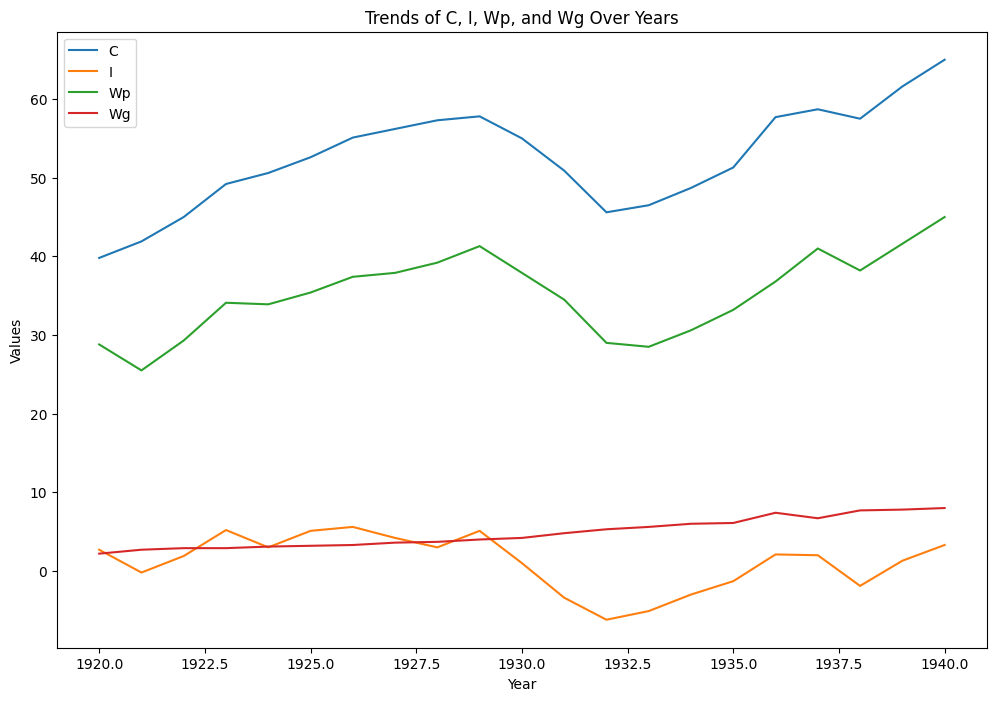

In [33]:
plt.figure(figsize=(12, 8))

# Visualize trends in 'C', 'I', 'Wp', and 'Wg'
variables_to_plot = ['C', 'I', 'Wp', 'Wg']
for variable in variables_to_plot:
    plt.plot(df_orig['Year'], df_orig[variable], label=variable)

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Trends of C, I, Wp, and Wg Over Years')
plt.legend()
plt.show()

Here created a correlation matrix to represent the correlation numerically, and visualized it as a heatmap using the seaborn library.

The values in the heatmap range from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.

For example, we see an almost perfect positive correlation between Wp (private wage) and consumption: 0.96, as well as with X (GNP),which would make sense given the dependencies between them.

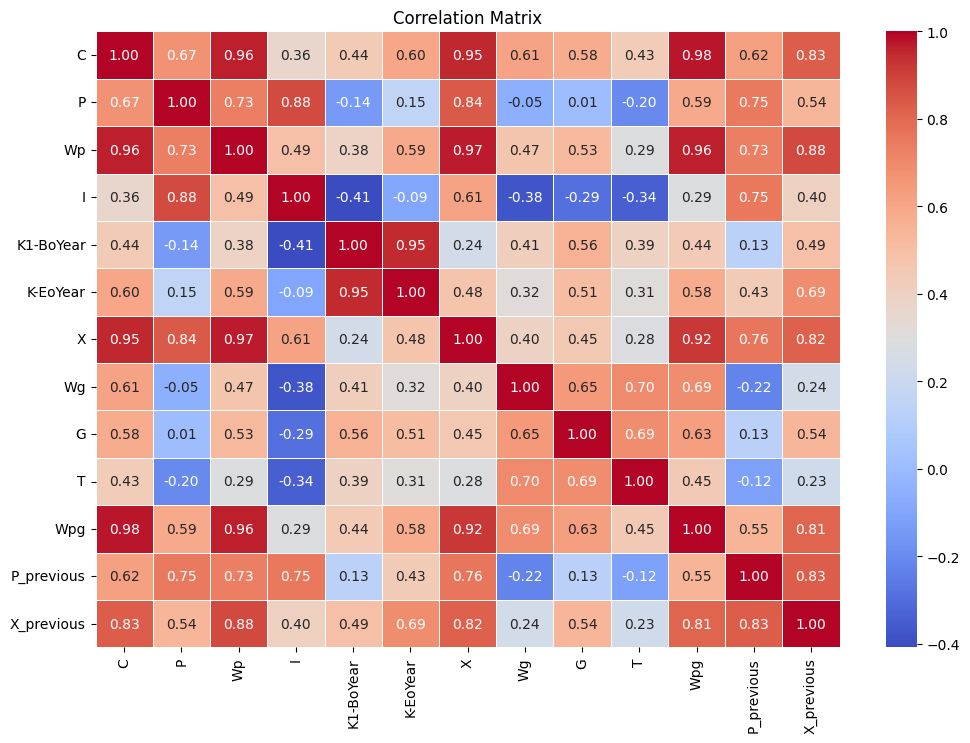

In [34]:
import seaborn as sns

variables_to_correlate = ['C', 'P', 'Wp', 'I', 'K1-BoYear', 'K-EoYear', 'X', 'Wg', 'G', 'T', 'Wpg', 'P_previous', 'X_previous']
correlation_matrix = df_orig[variables_to_correlate].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


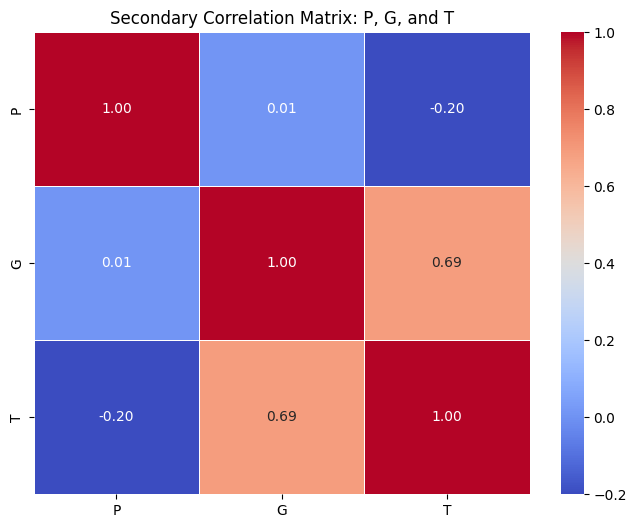

In [35]:
secondary_correlations = correlation_matrix.loc[['P', 'G', 'T'], ['P', 'G', 'T']]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(secondary_correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Secondary Correlation Matrix: P, G, and T')
plt.show()


Another extension would be to do some forecasting (to help with business planning, policy formulation, labor and trade planning, etc) and then compare it with real data, if available. Due to lack of time, we didn't get very far.

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Given data
years = np.array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941]).reshape(-1, 1)
C = np.array([39.8, 41.9, 45.0, 49.2, 50.6, 52.6, 55.1, 56.2, 57.3, 57.8, 55.0, 50.9, 45.6, 46.5, 48.7, 51.3, 57.7, 58.7, 57.5, 61.6, 65.0, 69.7]).reshape(-1, 1)
I = np.array([2.7, -0.2, 1.9, 5.2, 3.0, 5.1, 5.6, 4.2, 3.0, 5.1, 1.0, -3.4, -6.2, -5.1, -3.0, -1.3, 2.1, 2.0, -1.9, 1.3, 3.3, 4.9]).reshape(-1, 1)
Wp = np.array([28.8, 25.5, 29.3, 34.1, 33.9, 35.4, 37.4, 37.9, 39.2, 41.3, 37.9, 34.5, 29.0, 28.5, 30.6, 33.2, 36.8, 41.0, 38.2, 41.6, 45.0, 53.3]).reshape(-1, 1)
Wg = np.array([2.2, 2.7, 2.9, 2.9, 3.1, 3.2, 3.3, 3.6, 3.7, 4.0, 4.2, 4.8, 5.3, 5.6, 6.0, 6.1, 7.4, 6.7, 7.7, 7.8, 8.0, 8.5]).reshape(-1, 1)

# Linear regression models
model_C = LinearRegression().fit(years, C)
model_I = LinearRegression().fit(years, I)
model_Wp = LinearRegression().fit(years, Wp)
model_Wg = LinearRegression().fit(years, Wg)

# Forecasting for years 1935 through 1941
forecast_years = np.array([1935, 1936, 1937, 1938, 1939, 1940, 1941]).reshape(-1, 1)

forecast_C = model_C.predict(forecast_years)
forecast_I = model_I.predict(forecast_years)
forecast_Wp = model_Wp.predict(forecast_years)
forecast_Wg = model_Wg.predict(forecast_years)

# Displaying the forecasts
for i in range(len(forecast_years)):
    print(f"Forecast for {forecast_years[i][0]} - Consumption (C): {forecast_C[i][0]:.2f}")
    print(f"Forecast for {forecast_years[i][0]} - Investment (I): {forecast_I[i][0]:.2f}")
    print(f"Forecast for {forecast_years[i][0]} - Wages (Wp): {forecast_Wp[i][0]:.2f}")
    print(f"Forecast for {forecast_years[i][0]} - Wages (Wg): {forecast_Wg[i][0]:.2f}")
    print()

Forecast for 1935 - Consumption (C): 57.04
Forecast for 1935 - Investment (I): 0.72
Forecast for 1935 - Wages (Wp): 38.76
Forecast for 1935 - Wages (Wg): 6.35

Forecast for 1936 - Consumption (C): 57.86
Forecast for 1936 - Investment (I): 0.58
Forecast for 1936 - Wages (Wp): 39.37
Forecast for 1936 - Wages (Wg): 6.65

Forecast for 1937 - Consumption (C): 58.68
Forecast for 1937 - Investment (I): 0.45
Forecast for 1937 - Wages (Wp): 39.98
Forecast for 1937 - Wages (Wg): 6.96

Forecast for 1938 - Consumption (C): 59.51
Forecast for 1938 - Investment (I): 0.31
Forecast for 1938 - Wages (Wp): 40.59
Forecast for 1938 - Wages (Wg): 7.26

Forecast for 1939 - Consumption (C): 60.33
Forecast for 1939 - Investment (I): 0.17
Forecast for 1939 - Wages (Wp): 41.20
Forecast for 1939 - Wages (Wg): 7.57

Forecast for 1940 - Consumption (C): 61.15
Forecast for 1940 - Investment (I): 0.04
Forecast for 1940 - Wages (Wp): 41.81
Forecast for 1940 - Wages (Wg): 7.87

Forecast for 1941 - Consumption (C): 61.

Once we look at the original data, we see some differences between the information in Klein's table and the forecasted results we obtained.

For example, year 1935 in Klein's table shows the following numbers for Consumption, Investment, and wages: Wp and Wg.

C = 51.3

I = -1.3

Wp = 33.2

Wg = 6.1

The results from our linear regression are:
Forecast for 1935 - Consumption (C): 57.04

Forecast for 1935 - Investment (I): 0.72

Forecast for 1935 - Wages (Wp): 38.76

Forecast for 1935 - Wages (Wg): 6.35

The forecasts are more optimistic than the reality, with the exception of government wages which are very close in value, possibly showing, positively speaking, the consistent reliability of government wages, or, negatively speaking, their stagnation due to financial inaction.

In [37]:
df_orig

,Year,C,P,Wp,I,K1-BoYear,K-EoYear,X,Wg,G,T,Wpg,P_previous,X_previous,Years_deviation_f_base_year
0,1920,39.8,12.7,28.8,2.7,180.1,182.8,44.9,2.2,2.4,3.4,31.0,NaN,NaN,-11
1,1921,41.9,12.4,25.5,-0.2,182.8,182.6,45.6,2.7,3.9,7.7,28.2,12.7,44.9,-10
2,1922,45.0,16.9,29.3,1.9,182.6,184.5,50.1,2.9,3.2,3.9,32.2,12.4,45.6,-9
3,1923,49.2,18.4,34.1,5.2,184.5,189.7,57.2,2.9,2.8,4.7,37.0,16.9,50.1,-8
4,1924,50.6,19.4,33.9,3.0,189.7,192.7,57.1,3.1,3.5,3.8,37.0,18.4,57.2,-7
5,1925,52.6,20.1,35.4,5.1,192.7,197.8,61.0,3.2,3.3,5.5,38.6,19.4,57.1,-6
6,1926,55.1,19.6,37.4,5.6,197.8,203.4,64.0,3.3,3.3,7.0,40.7,20.1,61.0,-5
7,1927,56.2,19.8,37.9,4.2,203.4,207.6,64.4,3.6,4.0,6.7,41.5,19.6,64.0,-4
8,1928,57.3,21.1,39.2,3.0,207.6,210.6,64.5,3.7,4.2,4.2,42.9,19.8,64.4,-3
9,1929,57.8,21.7,41.3,5.1,210.6,215.7,67.0,4.0,4.1,4.0,45.3,21.1,64.5,-2


Next, we tried to forecast consumption, investment and wages for year 1942, so we can compare the numbers with real data. Using Klein's methods of calculations, we could have potentially derived his own figures for year 1942 (unless present in his published works) and compare it to this forecast, and the real-world data, to see how accurate his calculation methods would have been for forecasting.

In [38]:
# Forecasting for a specific year (e.g., 1942)
year_1942 = np.array([1942]).reshape(-1, 1)

forecast_C = model_C.predict(year_1942)
forecast_I = model_I.predict(year_1942)
forecast_Wp = model_Wp.predict(year_1942)
forecast_Wg = model_Wg.predict(year_1942)

print(f"Forecast for 1942 - Consumption (C): {forecast_C[0][0]:.2f}")
print(f"Forecast for 1942 - Investment (I): {forecast_I[0][0]:.2f}")
print(f"Forecast for 1942 - Wages (Wp): {forecast_Wp[0][0]:.2f}")
print(f"Forecast for 1942 - Wages (Wg): {forecast_Wg[0][0]:.2f}")

Forecast for 1942 - Consumption (C): 62.79
Forecast for 1942 - Investment (I): -0.24
Forecast for 1942 - Wages (Wp): 43.04
Forecast for 1942 - Wages (Wg): 8.48


4. Numerical Methods Interpretation

The Klein–Goldberger model was created in the 1950s and is a set of econometric equations. The authors attempt to replicate Fox's OLS parameter estimates using three different modern econometric software packages.

The Klein–Goldberger model is of particular interest because it was estimated in the early days of computing when electro-mechanical desk calculators were used. Fox's results were based on the limited information maximum likelihood (LIML) method, which was computationally demanding.

The examination reveals that while some of Fox's estimates are replicable, others cannot be reproduced using modern econometric software. In some cases, the reasons for lack of replicability are attributed to faulty computational methods used by Fox and his assistants. McCullough et al highlight the importance of computational advances over the years and how they may have influenced econometric results.
The key methods discussed in the article include:

**Ordinary Least Squares (OLS)**: The primary method used for estimating the parameters of econometric models. It minimizes the sum of the squared differences between observed and predicted values.

**Econometric Software Packages**: The authors used three different software packages for their replication attempts, namely RATS, Modler, and B34S. These packages are likely to involve various numerical algorithms and computational methods for estimating regression coefficients.

**Linear Regression Techniques**: The article discusses different methods for solving linear regression problems, such as Doolittle's algorithm, LU factorization, and QR decomposition. These methods are crucial for obtaining accurate estimates, especially in the presence of ill-conditioned data.

**Replication Methods**: The authors attempted to replicate Fox's OLS estimates using the original data set and equations provided by Klein and Goldberger. They also compared their results with Fox's published coefficients.

**Summary Statistics**: The article mentions the computation of summary regression statistics like R-squared (R2) and standard error of the estimate (s.e.e.) to assess the accuracy of the replication.

**Condition Numbers**: The authors computed the condition numbers for each equation to measure how many digits of accuracy might be lost when computing a regression. Condition numbers are indicative of the numerical stability of the regression.

The authors discuss issues related to ill-conditioning of data and the importance of accurate computational methods, noting that early methods, such as Doolittle's algorithm, were known to be less accurate, especially with ill-conditioned data. The article emphasizes the need for independent verification of econometric results, pointing out that computational advances do not eliminate problems of computational inaccuracy.

In the specific case of the Klein–Goldberger model, the authors find discrepancies in Fox's results for certain equations. They explore the reasons behind these discrepancies, considering factors like rounding errors and differences in variable definitions. The conclusion underscores the ongoing need for testing and improving econometric software and the importance of independent verification in the field of applied econometrics.

#Conclusion

Differences between coefficients in our ordinary least squares (OLS) model and Klein's coefficients raise questions about the reliability of economic models and the replicability of findings. Here are some considerations, some mentioned by McCullough himself:

1. Model Specification: Differences could stem from variations in model specification. It's essential to ensure that the models are similar in terms of the variables included, functional forms, and underlying assumptions. If there are substantial differences in model specification, it might be challenging to make direct comparisons.

2. Data Quality and Sources: Discrepancies could arise due to differences in data quality or sources. The reliability of coefficients is highly dependent on the accuracy and representativeness of the data. If there are issues with data quality or if different datasets are used, it can impact the comparability of results.

3. Assumptions and Simplifications: Economic models often rely on simplifying assumptions. Differences in assumptions and the level of abstraction can lead to variations in coefficients. It's crucial to be aware of the assumptions underlying each model and assess their validity in real-world contexts.

4. Model Estimation Techniques: The choice of estimation technique, such as OLS, instrumental variables, or others, can impact coefficient estimates. If Klein's model used a different estimation method, it could contribute to disparities in coefficients.

5. Context and Time Dynamics: Economic conditions and relationships can change over time. Economic relationships may not be constant, and changes in policy, technology, or other factors can influence coefficients.

These differences highlight the importance of rigorous validation and robustness checks. Replication studies, sensitivity analyses, and comparing results across different datasets can help assess the generalizability of economic models.

Additionally, it's crucial for researchers to be transparent about their methodologies, data sources, and assumptions. This transparency allows others to understand and, if necessary, critique the research, contributing to the overall robustness and reliability of economic models.

# CHALLENGE 2

#1. The Objective Function

Define the optimization problem to be solved: the objective functions together
with all the constraints.

Objective function:

18x1+25x2+10x3+12x4+15x5

M1 = 1.2x1+1.3x2+0.7x3+0*x4+2.5x5 <= 45 hours * 4

M2 = 0.7x1+2.2x2+1.6x3+0.5*x4+1.0x5 <= 45 hours * 5

M3= 0.9x1+0.7x2+1.3x3+1.0*x4+0.8x5 <= 45 hours * 3

M4= 1.4x1+2.8x2+0.5x3+1.2*x4+0.6x5 <= 45 hours * 4


To maximize the total profit, we need to determine how much of each product to produce with each machine. The objective function will be the sum of profits for each product and machine combination, while the constraints will include:

Each machine can operate up to 45 hours per week.
Each product requires a certain amount of machine time per unit produced (as given in the table).
Product 4 does not require machine 1.

Some information would be useful to know:
* Lag time when transferring a product to the next machine for further processing, then onto the next machine until it's finished, is not taken into account but it would be useful to know how much time is wasted by one product waiting in queue to be processed by the next machine.
* We also don't have information about idle time of machines or maintenance.
* According to Goldratt, a constraint can be the very requirement of keeping a machine occupied and producing all the time. If one machine produces too much, while the next is busy with old units, this creates a bottleneck and an inventory which is not being used. This delays shipping out the units, which may affect profits (an example would be having to pay for expedited shipping because of the delay)
* The manufacturer's policy of prioritizing/deprioritizing various products which take the longest or the shortest time depending on which orders are overdue.

(Goldratt, Eliyahu M., 1947-2011. The Goal : a Process of Ongoing Improvement. Great Barrington, MA :North River Press, 2004.)

We may have additional constraints based on the extensions, such as minimum production requirements or integer-only production levels.

#Alternative Objective Function


Another extension of this problem would be to calculate optimization based on profit per machine hour, which requires a modification of the objective function.

We will divide the profit by the machine hours required for each product, which will give the following objective function:

P = profit per hour
P/machine = [18/1.2, 25/0.7, 10/0.9, 12/1.4, 15/2.5]

max P0*x1 + P1*x2 + P2*x3 + P3*x4 + P4*x5

In [39]:
from scipy.optimize import linprog
import numpy as np

def maximize_profit_per_machine_hour():
    # Coefficients of the objective function (negative because linprog does minimization)
    profit_per_hour = np.array([18/1.2, 25/0.7, 10/0.9, 12/1.4, 15/2.5])

    # Coefficients of the inequality constraints (machine hours per product)
    A = [
        [1.2, 1.3, 0.7, 0.0, 2.5],
        [0.7, 2.2, 1.6, 0.5, 1.0],
        [0.9, 0.7, 1.3, 1.0, 0.8],
        [1.4, 2.8, 0.5, 1.2, 0.6]
    ]

    # Right-hand side of the inequality constraints (total machine hours available per week)
    b = [45, 45, 45, 45]

    # Bounds for each variable (product) ensuring non-negativity
    bounds = [(0, None)] * 5

    # Solve the problem
    result = linprog(-profit_per_hour, A_ub=A, b_ub=b, bounds=bounds, method='highs')

    # Extract the optimal production quantities
    optimal_quantities = result.x

    # Calculate total profit
    total_profit = -result.fun

    return optimal_quantities, total_profit

# Example usage:
optimal_quantities, total_profit = maximize_profit_per_machine_hour()

# Display the results
print("Optimal Production Quantities per Machine Hour:")
for i, x in enumerate(optimal_quantities, start=1):
    print(f"Product {i}: {x:.2f} units")

print("\nTotal Profit per Machine Hour:", total_profit)

Optimal Production Quantities per Machine Hour:
Product 1: 0.00 units
Product 2: 14.64 units
Product 3: 7.99 units
Product 4: 0.00 units
Product 5: 0.00 units

Total Profit per Machine Hour: 611.7920540997463


#Challenge 3
#THE OVERLAPPING GENERATIONS (OLG) MODEL
Free Component
(in collaboration with Joana Araújo Vicente Soares)

In the 1940s a French economist named Maurice Allais, introduced the Overlapping Generations Model into economics. He wrote it in French and it was sort of rediscovered by Samuelson in the 1950s.
(Yale University: Open Yale Courses.ECON 251 - Overlapping Generations Models of the Economy https://oyc.yale.edu/economics/econ-251/lecture-12)
The OLG model is one of the macroeconomic models concerned with economic growth, the way consumers change their behavior throughout their lives, and the ripple effects of the interactions between various agents in the economy.

The goal of this project is to look into the changing dynamics between fiscal policy, aging populations, specifically Portugal, and other factors. Many countries have populations with longer life spans, which presents some challenges in terms of fiscal planning, especially when it comes to pension management. On the other hand, there may an opportunity for economic development and growth targeted towards retirees, who generally spend more and save less.

The goal of this project is to look into the changing dynamics between fiscal policy, aging populations, specifically Portugal, and other factors.

#Stages of an OLG Model

1. Define the Model structure
* time periods - determine the number of time periods or generations in the model and specify the length of each time period
* demographic structure: age distribution of the population, net migration, mortality and fertility rates
* economic agents - identify the relevant economic agents (the government, households, businesses) and their roles in each time period
* describe the lifecycle of individuals, focusing on their decisions related to consumption, savings, and wages

2. Introduce key variables
* endowments and resources (capital, labor, etc) for each generation
* preferences - define intertemporal preferences for consumption and leisure
* introduce utility functions to express those preferences
* technology - how it affects firms (specify production functions) and if technological progress changes over time

3. Formulate dynamic equations
* budget constraints (for households, consumption, savings, etc)
* describe the accumulation of capital over time such as investment decisions and changes in capital stock
* intertemporal decision rules related to consumption, savings and labor supply for households

4. Government and policy
* define the role of the government in the model and specify government policies (pension, taxation, public spending)
* conduct policy experiments by introducing changes to government policies and analyze their impact

5. Simulation and analysis
* implement numerical methods or simulations to solve the model
* use dynamic programming or iterative methods
* conduct sensitivity analysis on key parameters to verify the robustness of the model
* perform scenario analysis for different demographics or economic conditions

6. Interpretation and conclusions
* interpret results - analyze the model in terms of economic outcomes, inequality and generational welfare
* formulate policy recommendations based on the results of the model and their advantages and disadvantages
* assess the limitations of the model and improvements that can be made

7. Documentation and communication
* document the model's assumptions, equations and structure
* communicate findings in a report or summary containing the model, methodology and key insights

Finally, we should validate the model with real-world data, where available, and look for ways to correct the assumptions of the model, or to expand on the current method.

#Context
Country: Portugal

Sources of data:

*Federal Reserve Economic Data (FRED)

*for average annual wages: statista.com (https://www.statista.com/statistics/419498/average-annual-wages-portugal-y-on-y/)

*for the annual wage growth rate: https://gulbenkian.pt/wp-content/uploads/2022/10/FF_SumarioExecutivo_SalarioMedio_en.pdf

**Population Dynamics:** The model incorporates the country's declining population growth rate. This affects the number of working individuals contributing to the pension system and the number of retirees drawing from it.

**Economic Growth:** Productivity growth impacts wages and thus the savings capacity of the younger generation. Higher wages could mean more savings, potentially easing the pension burden.
Savings Behavior: The dynamic savings rate in the model reflects how individuals might respond to changes in wages and interest rates, which are crucial for pension fund investments.

**Pension Reforms Analysis:** Pension systems in countries with aging populations will be affected dramatically over the next few years, and possibly, decades. Governments might propose changes like adjusting the retirement age or altering contribution rates. The model can simulate how these changes impact the capital accumulation and the overall sustainability of the pension system.

**Policy Implications:** By analyzing different policy scenarios (like increasing the retirement age or changing the pension contribution rate), the model helps in understanding the long-term impacts on both the working population and retirees.

**Inter-Generational Equity:** The model can shed light on how pension reforms affect different generations. For example, increasing the retirement age might burden the current young generation but could be beneficial for future generations.

**Economic Stability:** The model can also help in understanding how pension reforms impact overall economic stability, especially in terms of savings and capital formation.
- In Portugal, the pension system includes contributions from both employees and employers towards the state pension. The typical social security contribution towards the state pension is around 11% of an employee’s wage, while employers contribute an additional 23.75%. This total contribution includes provisions for survivor and disability pensions as well. It's important to note that for public sector workers, pension contributions amount to a minimum of 3%, and for self-employed individuals, the contribution rate is 29.6% of earnings.
- By the Federal Reserve Economic Data (FRED) from the St. Louis Fed, It shows Portugal's capital stock at constant national prices for 2019 was approximately 2,605,407.5 million U.S. dollars (in 2017 prices).

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Portugal
initial_population = 10237042  # Current population of Portugal
annual_population_growth_rate = -0.00232  # Annual population decline
annual_wage_growth_rate = 0.034  # Average wage growth rate
initial_wage = 1.0  # Normalized initial wage rate
initial_interest_rate = 0.0450  # Interest rate from ECB
initial_pension_contribution_rate = 0.11  # Employee pension contribution rate
initial_capital_stock = 2605407.5 * 1e6  # Capital stock in 2019, adjusted to 2017 USD
estimated_proportion_retired = 0.20  # Estimated proportion of population retired


A simplified version of the Cobb-Douglas production function is introduced to determine the wage dynamics based on the capital stock and population.

In [41]:
# New parameters for the Cobb-Douglas production function
alpha = 0.3  # Capital share in output
savings_rate = 0.2  # Assumed constant savings rate
depreciation_rate = 0.05  # Depreciation rate of capital

The model is simulated over a specified number of time periods (T). In each period, the model updates the population, wage, interest rate, pension contribution rates, and capital stock based on the specified growth rates or assumptions.

In [42]:
# Number of periods
num_generations = 50

We initialize each array to a default value of 0.

In [43]:
# Arrays to store variables over time
population = np.zeros(num_generations)
wage = np.zeros(num_generations)
pension_benefits = np.zeros(num_generations)
capital = np.zeros(num_generations)

# Initialize variables
population[0] = initial_population
wage[0] = initial_wage
capital[0] = initial_capital_stock

The Cobb-Douglas production function

In [44]:
# Function for Cobb-Douglas production
def production(capital, labor):
    return capital**alpha * labor**(1 - alpha)

Function to calculate pension benefits

In [45]:
# Function to calculate pension benefits
def calculate_pension_benefits(population, wage, contribution_rate, proportion_retired):
    total_contributions = population * wage * contribution_rate
    return total_contributions / (population * proportion_retired)

The simulation iterates over each time period, updating population, wage, labor force, output, savings, pension benefits, and capital stock based on specified growth rates or assumptions.

In [46]:
for t in range(1, num_generations):
    population[t] = population[t-1] * (1 + annual_population_growth_rate)
    wage[t] = wage[t-1] * (1 + annual_wage_growth_rate)
    labor = population[t-1]  # Labor force

    output = production(capital[t-1], labor)
    savings = output * savings_rate
    pension_benefits[t] = calculate_pension_benefits(population[t-1], wage[t-1], initial_pension_contribution_rate, estimated_proportion_retired)

    capital[t] = (1 - depreciation_rate) * capital[t-1] + savings

Plotting

The results are plotted in a 2x2 grid of subplots, showing the dynamics of population, wage growth, pension benefits per retiree, and capital stock over generations.

Population Dynamics: The first subplot shows how the population changes over time.

Pension Benefits: The third subplot illustrates the pension benefits per retiree.
Capital Stock Dynamics: The fourth subplot displays the dynamics of the capital stock.
Final Plot:
All subplots are arranged in a 2x2 grid for a comprehensive view of the model dynamics.

Text(0.5, 1.0, 'Population Dynamics')

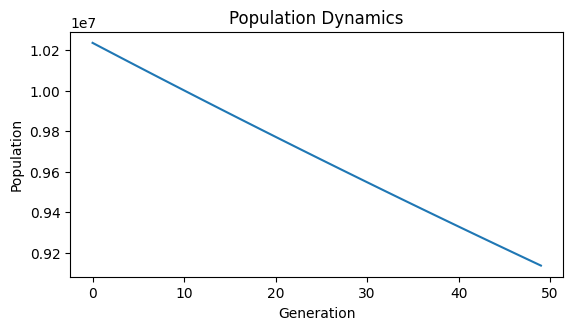

In [47]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.plot(population, label='Population')
plt.xlabel('Generation')
plt.ylabel('Population')
plt.title('Population Dynamics')

The second subplot depicts the growth of wages over generations.

Text(0.5, 1.0, 'Wage Growth')

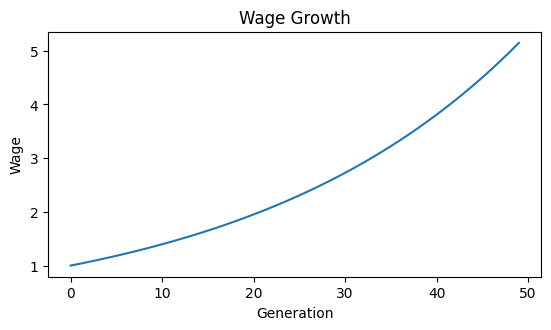

In [48]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 2)
plt.plot(wage, label='Wage')
plt.xlabel('Generation')
plt.ylabel('Wage')
plt.title('Wage Growth')

The third subplot illustrates the pension benefits per retiree.

Text(0.5, 1.0, 'Pension Benefits per Retiree')

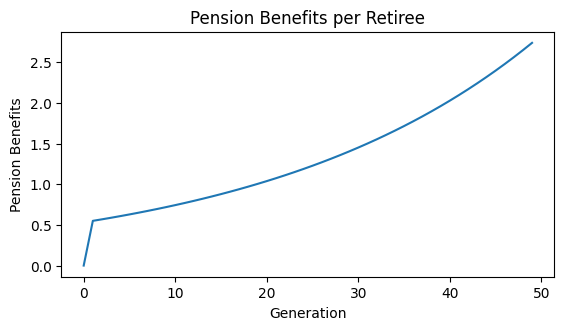

In [49]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 3)
plt.plot(pension_benefits, label='Pension Benefits')
plt.xlabel('Generation')
plt.ylabel('Pension Benefits')
plt.title('Pension Benefits per Retiree')

The fourth subplot displays the dynamics of the capital stock

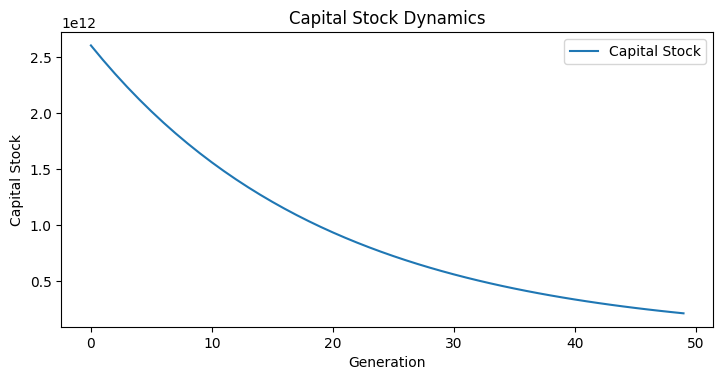

In [50]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 4)
plt.plot(capital, label='Capital Stock')
plt.xlabel('Generation')
plt.ylabel('Capital Stock')
plt.title('Capital Stock Dynamics')

plt.tight_layout()
plt.legend()
plt.show()

All plots vizualized together

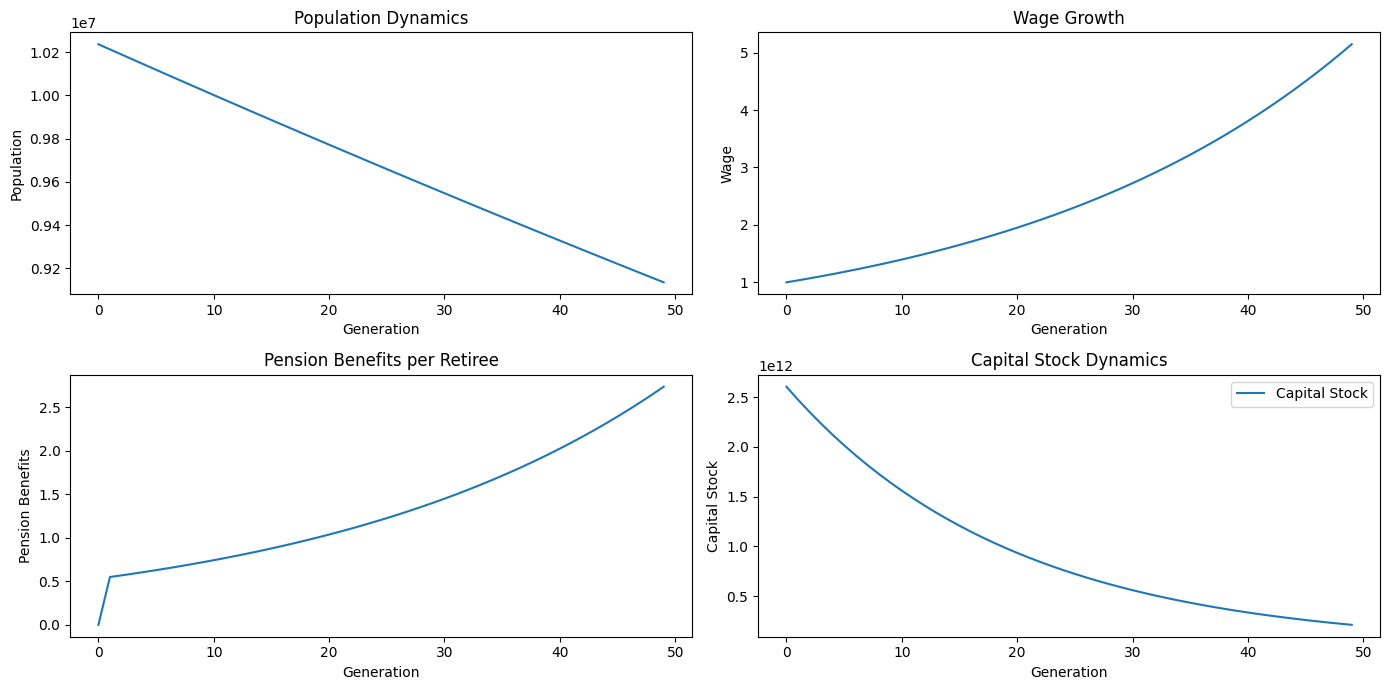

In [51]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.plot(population, label='Population')
plt.xlabel('Generation')
plt.ylabel('Population')
plt.title('Population Dynamics')

plt.subplot(2, 2, 2)
plt.plot(wage, label='Wage')
plt.xlabel('Generation')
plt.ylabel('Wage')
plt.title('Wage Growth')

plt.subplot(2, 2, 3)
plt.plot(pension_benefits, label='Pension Benefits')
plt.xlabel('Generation')
plt.ylabel('Pension Benefits')
plt.title('Pension Benefits per Retiree')

plt.subplot(2, 2, 4)
plt.plot(capital, label='Capital Stock')
plt.xlabel('Generation')
plt.ylabel('Capital Stock')
plt.title('Capital Stock Dynamics')

plt.tight_layout()
plt.legend()
plt.show()

- Population Dynamics:
The population shows a declining trend, consistent with the negative annual population growth rate set in the model.
This decline can have significant implications for the labor force and the economy. A shrinking population, especially if it involves a decreasing workforce, can lead to challenges in sustaining economic growth and supporting public pension systems.

- Wage Growth:
The wages increase steadily over the generations. This is driven by the assumed constant annual wage growth rate.
The increasing wage trend is positive for individual income levels but, combined with a declining population, it could increase the per capita burden of funding pensions and other social services.

- Pension Benefits per Retiree:
Pension benefits per retiree appear to be relatively stable, which suggests that the pension system, as modeled, is somewhat resilient to the demographic changes.
The stability in pension benefits, despite a declining population, might be due to the increasing wage levels which lead to higher contributions per worker. However, this equilibrium might be sensitive to changes in wage growth rates or pension policy adjustments.

- Capital Stock Dynamics:
The capital stock shows an overall increasing trend over the generations. This indicates that the economy, in terms of its capital base, is growing.
The growth in capital stock is a positive sign, suggesting that the economy has the potential for increased productivity and investment opportunities. However, the real impact on economic growth would also depend on how efficiently this capital is utilized.

NOTE:This model is a simplification and does not capture all the complexities of an actual economy, such as the impact of technological advancements, external economic shocks, or detailed policy changes. The results should therefore be interpreted as indicative trends rather than precise predictions.

In light of Portugal's migration trends, emigration as well as immigration, it would be interesting to compare an old OLG model from before the last mass migration with the results of this current-day OLG model.

#Possible Extensions:

- introduce technology/AI
- introduce government spending and fiscal policy (see Macroeconomics)
- introduce shocks

Technology and AI

Introducing technology and/or AI variables involves assessing the rate of usage, the type of technology, the types of industries specific to Portugal that would be directly impacted by new technology and the use of AI and that are relevant for our model's parameters, the impact of the availability of technology to the population at large on migration, both inwards and outwards, and more.

In [52]:
# Adding a variable for the annual technological progress rate and for the annual AI efficiency improvement rate.

technology_rate = 0.10
ai_efficiency_rate = 0.05

Define function for Cobb-Douglas production with technological progress

In [53]:
def production(capital, labor, technology, ai_efficiency):
    return (capital**alpha) * (labor**(1 - alpha)) * (technology**alpha) * (ai_efficiency**alpha)


Re-state the function to calculate pension benefits

In [54]:
def calculate_pension_benefits(population, wage, contribution_rate, proportion_retired):
    total_contributions = population * wage * contribution_rate
    return total_contributions / (population * proportion_retired)

We write a simulation loop which updates the key economic variables, such as population, wage, pension benefits, and capital stock, in each generation.

In [55]:
for t in range(1, num_generations):
    population[t] = population[t - 1] * (1 + annual_population_growth_rate)
    wage[t] = wage[t - 1] * (1 + annual_wage_growth_rate)
    labor = population[t - 1]  # Labor force

    # Incorporate technological progress
    technology = (1 + technology_rate)**t

    # Incorporate AI efficiency improvement
    ai_efficiency = (1 + ai_efficiency_rate)**t

    output = production(capital[t - 1], labor, technology, ai_efficiency)
    savings = output * savings_rate
    pension_benefits[t] = calculate_pension_benefits(population[t - 1], wage[t - 1], initial_pension_contribution_rate, estimated_proportion_retired)

    # Update capital with technological progress
    capital[t] = (1 - depreciation_rate) * capital[t - 1] + savings * technology


We re-plot the results in a 2x2 grid of subplots, showing the dynamics of population, wage growth, pension benefits per retiree, and capital stock over generations.

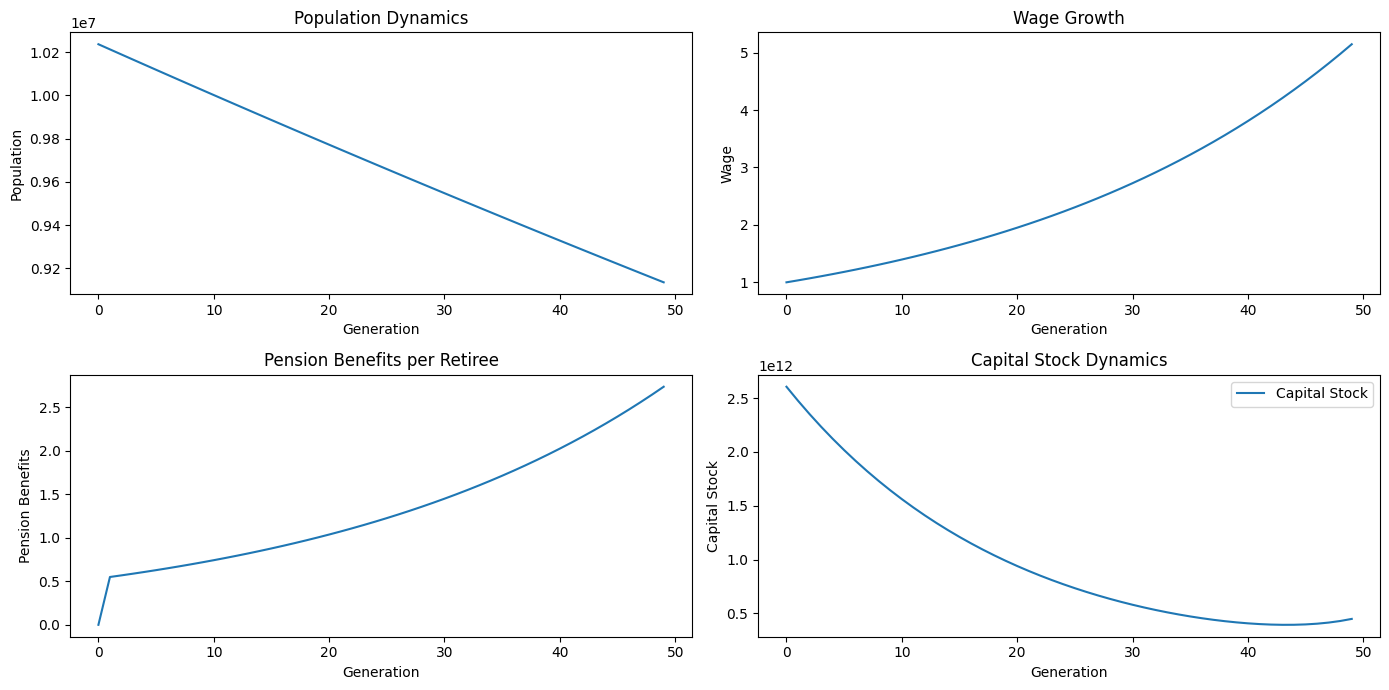

In [56]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.plot(population, label='Population')
plt.xlabel('Generation')
plt.ylabel('Population')
plt.title('Population Dynamics')

plt.subplot(2, 2, 2)
plt.plot(wage, label='Wage')
plt.xlabel('Generation')
plt.ylabel('Wage')
plt.title('Wage Growth')

plt.subplot(2, 2, 3)
plt.plot(pension_benefits, label='Pension Benefits')
plt.xlabel('Generation')
plt.ylabel('Pension Benefits')
plt.title('Pension Benefits per Retiree')

plt.subplot(2, 2, 4)
plt.plot(capital, label='Capital Stock')
plt.xlabel('Generation')
plt.ylabel('Capital Stock')
plt.title('Capital Stock Dynamics')

plt.tight_layout()
plt.legend()
plt.show()

Even though the simulation loop now includes the calculation of the technological factor, where we would expect an impact on the production process over time, we see no difference in our results.

It's possible, but highly unlikely, that the impact of technology is difficult to incorporate significantly in these calculations, or that these functions are wrong. One way to review our method is to formulate the impact of technology and AI mathematically, and re-visit all of our calculations, drawing inspiration from works such as Growth with Overlapping Generations by Dmytro Hryshko (http://www.artsrn.ualberta.ca/econweb/hryshko/Econ581Fall2014/08_GrowthOLG.pdf). Additionally, we need to experiment with the code more, to refine our method, and possibly get more accurate results.

We have seen an increase in studies on the impact of technology on the labor market, both country-specific and global. Research such as *The economics of artificial intelligence: Implications for the future of work* can be incorporated into new OLG models to reflect the dramatic changes new technology has generated over the last 20+ years.

[International Labour Office] - Geneva: ILO, 2018. The economics of artificial intelligence: Implications for the future of work. Accessed: 19 Dec, 2023. https://www.ilo.org/wcmsp5/groups/public/---dgreports/---cabinet/documents/publication/wcms_647306.pdf

#Equilibrium

Introduce a new parameter for equilibrium check

In [57]:
equilibrium_threshold = 1e-6

In [58]:
for t in range(1, num_generations):
    population[t] = population[t - 1] * (1 + annual_population_growth_rate)
    wage[t] = wage[t - 1] * (1 + annual_wage_growth_rate)
    labor = population[t - 1]  # Labor force

    # Incorporate technological progress
    technology = (1 + technology_rate)**t

    # Incorporate AI efficiency improvement
    ai_efficiency = (1 + ai_efficiency_rate)**t

    output = production(capital[t - 1], labor, technology, ai_efficiency)
    savings = output * savings_rate
    pension_benefits[t] = calculate_pension_benefits(population[t - 1], wage[t - 1], initial_pension_contribution_rate, estimated_proportion_retired)

    # Update capital with technological progress
    capital[t] = (1 - depreciation_rate) * capital[t - 1] + savings * technology

    # Check for equilibrium
    if (
        np.abs(population[t] - population[t - 1]) < equilibrium_threshold
        and np.abs(wage[t] - wage[t - 1]) < equilibrium_threshold
        and np.abs(pension_benefits[t] - pension_benefits[t - 1]) < equilibrium_threshold
        and np.abs(capital[t] - capital[t - 1]) < equilibrium_threshold
    ):
        print(f"Equilibrium reached at generation {t}")
        break

We use a single plt.plot statement for each variable, allowing them to be overlaid in a single graph. The equilibrium point is indicated in the console output when the equilibrium is reached.

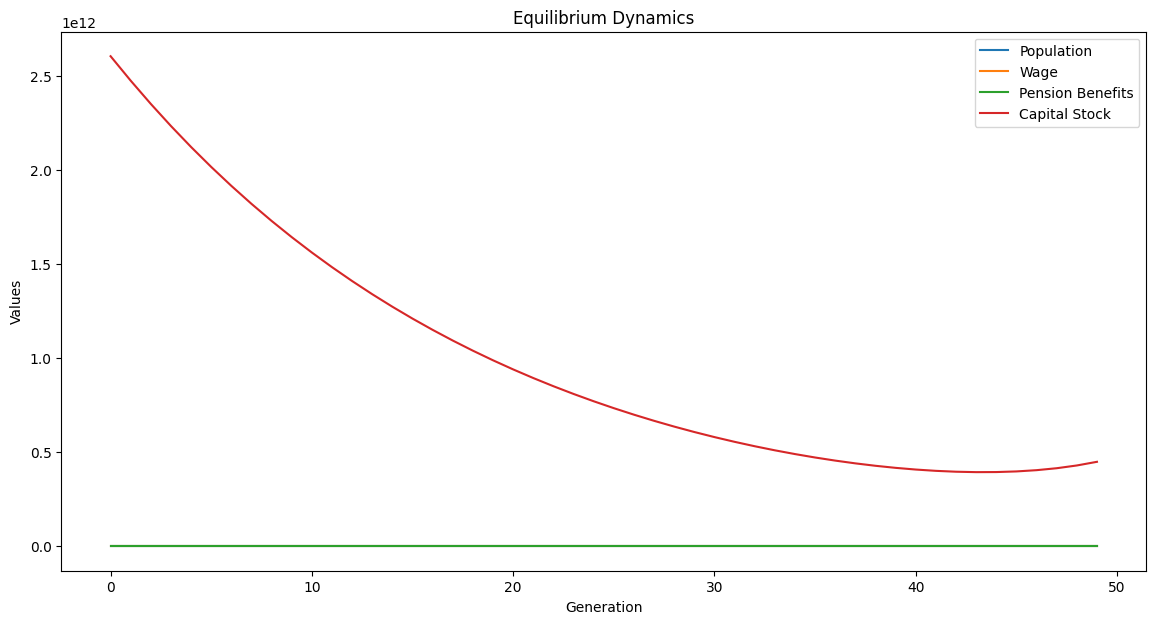

In [59]:
plt.figure(figsize=(14, 7))

plt.plot(population[:t+1], label='Population')
plt.plot(wage[:t+1], label='Wage')
plt.plot(pension_benefits[:t+1], label='Pension Benefits')
plt.plot(capital[:t+1], label='Capital Stock')

plt.xlabel('Generation')
plt.ylabel('Values')
plt.title('Equilibrium Dynamics')
plt.legend()
plt.show()


This seems to indicate that there's no equilibrium point, given the parameters for Portugal's situation. This does not bode well for Portugal.

More coherence, inter-relational cooperation, and short-term stabilization with long-term goals of growth and sustainability are necessary in order to bring together demographics, consumer and business behavior (such as choices in consumption, savings, investments, and the supply and demand dynamic), along with fiscal policy, and other micro- and macro- policies.

Changing some of the parameters to see if equilibrium can be reached:

* annual_wage_growth_rate has been increased from 0.034 to 0.1
* initial_pension_contribution_rate has been increased from 0.11 to 0.15
* initial_capital_stock has been increased from 2605407.5 * 1e6 to 280 * 1e6
* estimated_proportion_retired has been decreased to 0.10

In [60]:
import numpy as np
import matplotlib.pyplot as plt


# Initial parameters for Portugal
# initial_population = 10237042  # Current population of Portugal
# annual_population_growth_rate = -0.00232  # Annual population decline
# annual_wage_growth_rate = 0.034  # Average wage growth rate
# initial_wage = 1.0  # Normalized initial wage rate
# initial_interest_rate = 0.0450  # Interest rate from ECB
# initial_pension_contribution_rate = 0.11  # Employee pension contribution rate
# initial_capital_stock = 2605407.5 * 1e6  # Capital stock in 2019, adjusted to 2017 USD
# estimated_proportion_retired = 0.20  # Estimated proportion of population retired

# Fictional parameters for Portugal
initial_population = 10237042
annual_population_growth_rate = -0.002
annual_wage_growth_rate = 0.1
initial_wage = 1.0
initial_interest_rate = 0.0450
initial_pension_contribution_rate = 0.15
initial_capital_stock = 280 * 1e6
estimated_proportion_retired = 0.10

alpha = 0.3
savings_rate = 0.15
depreciation_rate = 0.03
technology_rate = 0.02  # Adjusted technology rate

num_generations = 50
equilibrium_threshold = 1e-6
equilibrium_found = False

# Arrays to store variables over time
population = np.zeros(num_generations)
wage = np.zeros(num_generations)
pension_benefits = np.zeros(num_generations)
capital = np.zeros(num_generations)

# Initialize variables
population[0] = initial_population
wage[0] = initial_wage
capital[0] = initial_capital_stock

# Function for Cobb-Douglas production
def production(capital, labor):
    return capital**alpha * labor**(1 - alpha)

# Function to calculate pension benefits
def calculate_pension_benefits(population, wage, contribution_rate, proportion_retired):
    total_contributions = population * wage * contribution_rate
    return total_contributions / (population * proportion_retired)

# Run the simulation loop until equilibrium is reached
for t in range(1, num_generations):
    # Labor force
    labor = population[t-1]

    # Cobb-Douglas production
    output = production(capital[t-1], labor)

    # Savings
    savings = output * savings_rate

    # Pension benefits
    pension_benefits[t] = calculate_pension_benefits(population[t-1], wage[t-1], initial_pension_contribution_rate, estimated_proportion_retired)

    # Technological change
    capital[t] = (1 - depreciation_rate) * capital[t-1] + savings + technology_rate * output

    # Population and wage dynamics
    population[t] = population[t-1] * (1 + annual_population_growth_rate)
    wage[t] = wage[t-1] * (1 + annual_wage_growth_rate)

    # Check for equilibrium
    if (
        np.abs(population[t] - population[t - 1]) < equilibrium_threshold
        and np.abs(wage[t] - wage[t - 1]) < equilibrium_threshold
        and np.abs(pension_benefits[t] - pension_benefits[t - 1]) < equilibrium_threshold
        and np.abs(capital[t] - capital[t - 1]) < equilibrium_threshold
    ):
        equilibrium_found = True
        print(f"Equilibrium reached at generation {t}")
        break

# Plot the results
if equilibrium_found:
    plt.figure(figsize=(14, 7))
    plt.plot(population, label='Population')
    plt.plot(wage, label='Wage')
    plt.plot(pension_benefits, label='Pension Benefits')
    plt.plot(capital, label='Capital Stock')
    plt.xlabel('Generation')
    plt.ylabel('Values')
    plt.title('Equilibrium Dynamics')
    plt.legend()
    plt.show()
else:
    print("Equilibrium not reached with the current parameters. Enter different parameters.")


Equilibrium not reached with the current parameters. Enter different parameters.


This state of disequilibrium is not specific to just Portugal, and finding the equilibrium point is a trial-and-error process. The equilibrium point will be different for each country, based on its specific economic and demographic profile, and possibly other factors.

More exploration is needed, and our modest attempts to investigate the relationships between these parameters and random but permanent intrusions (such as technology) are only scratching the surface. Another noteworthy influence, yet to be fully understood, will be climate change.

As we've seen, as the world changes, so does economics, and we have to constantly adapt our thinking for successful analyses, principled decision-making and rewarding economic planning.